<a href="https://colab.research.google.com/github/psylanrex/notebooks/blob/master/demo_airbnb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'My Drive/Colab Notebooks/demo-airbnb/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [95]:
df = pd.read_csv("/content/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [96]:
df.shape

(48895, 16)

In [0]:
import matplotlib.pyplot as plt
import plotly as plotly
%matplotlib inline
import folium
from folium import plugins
from folium.plugins import MarkerCluster

## Data exploration

In [98]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [99]:
null_count = df.isnull().sum().sort_values(ascending=False)
null_count

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

Fill null values in reviews_per_month

In [100]:
df[df['number_of_reviews'] == 0.0].shape
# number_of_revies: 10052, equal to null values of reviews_per_month, so it's reasonable to fill reviews_per_month 0 wherever it is null

(10052, 16)

In [0]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [0]:
# convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True)
# find earliest date for last_reviews column
earliest = min(df['last_review'])
df['last_review'] = df['last_review'].fillna(earliest)
# convert last_review value from datetime to ordinal
df['last_review'] = df['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

In [0]:
# there are missing values on host and host_name columns, these are not necessary info, so they will be dropped
df.drop(['name', 'host_name'], axis=1, inplace=True)

In [104]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2762,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2976,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,3021,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2793,0.10,1,0


In [0]:
# Convert price to float
df['price'] = df['price'].astype(float)

In [106]:
neighborhood_grouped = df.groupby(['neighbourhood_group']).mean()
neighborhood_grouped.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1, inplace=True)
neighborhood_grouped

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,
Bronx,87.496792,4.560953,26.004583,2322.527039,1.475655,2.233731,165.758937
Brooklyn,124.383207,6.056556,24.202845,2240.543275,1.049790,2.284371,100.232292
Manhattan,196.875814,8.579151,20.985596,2087.042611,0.976782,12.791330,111.979410
Queens,99.517649,5.181433,27.700318,2294.371514,1.567076,4.060184,144.451818
Staten Island,114.812332,4.831099,30.941019,2465.201072,1.576381,2.319035,199.678284


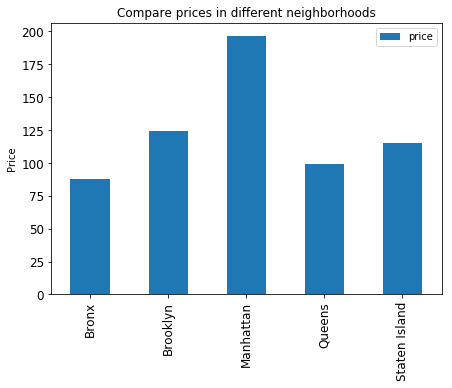

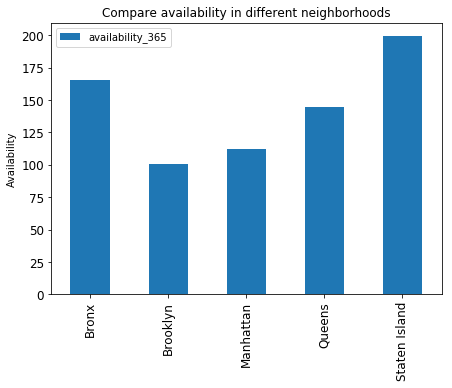

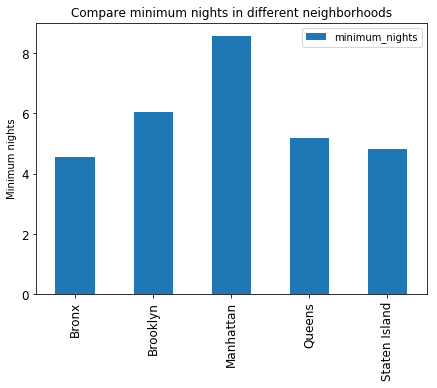

In [107]:
ax1 = neighborhood_grouped[['price']].plot(kind='bar', figsize=(7, 5), legend=True, fontsize=12, title='Compare prices in different neighborhoods')
ax1.set_xlabel('')
ax1.set_ylabel('Price')
ax2 = neighborhood_grouped[['availability_365']].plot(kind='bar', figsize=(7, 5), legend=True, fontsize=12, title='Compare availability in different neighborhoods')
ax2.set_xlabel('')
ax2.set_ylabel('Availability')
ax3 = neighborhood_grouped[['minimum_nights']].plot(kind='bar', figsize=(7, 5), legend=True, fontsize=12, title='Compare minimum nights in different neighborhoods')
ax3.set_xlabel('')
ax3.set_ylabel('Minimum nights')
plt.show()

In [0]:
import seaborn as sns

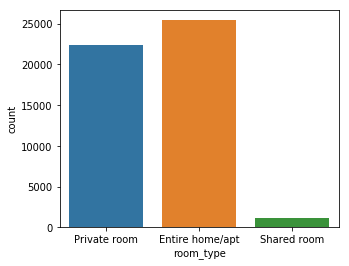

In [109]:
plt.figure(figsize=[5,4])
# plt.subplot(211)
sns.countplot(x="room_type", data=df)

In [0]:
most_reviews_df = df.sort_values(by=['number_of_reviews'], ascending=False).head(1000)

In [111]:
print('Listing with most reviews')
Long = -73.80
Lat = 40.80
# most_reviews_map = folium.Map([Lat,Long], zoom_start=10, width='50%', height='50%')
# map1_rooms_map = plugins.MarkerCluster().add_to(most_reviews_map)
# for lat, lon, label in zip(most_reviews_df.latitude, most_reviews_df.longitude, most_reviews_df.id):
#     folium.Marker(location=[lat, lon], icon=folium.Icon(icon='home'), popup=label).add_to(map1_rooms_map)
# most_reviews_map.add_child(map1_rooms_map)
# most_reviews_map

Listing with most reviews


In [0]:
most_expensive_df = df.sort_values(by=['price'], ascending=False).head(1000)

In [113]:
print('Listing with highest price')
# Long = -73.80
# Lat = 40.80
# most_expensive_map = folium.Map([Lat,Long], zoom_start=10, width='50%', height='50%')
# map2_rooms_map = plugins.MarkerCluster().add_to(most_expensive_map)
# for lat, lon, label in zip(most_expensive_df.latitude, most_expensive_df.longitude, most_expensive_df.id):
#     folium.Marker(location=[lat, lon], icon=folium.Icon(icon='home'), popup=label).add_to(map2_rooms_map)
# most_expensive_map.add_child(map2_rooms_map)
# most_expensive_map

Listing with highest price


### Train test split

In [114]:
num_features = df.select_dtypes(exclude=['object'])
y = num_features.price
num_features = num_features.drop(['price', 'id', 'host_id'], axis=1)
num_features.shape
# num_features

(48895, 8)

In [0]:
cat_features = df.select_dtypes(include=['object'])
cat_features_dummies = pd.get_dummies(cat_features)

In [0]:
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample
from xgboost import XGBRegressor

In [0]:
X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size=0.2, random_state=42)

In [0]:
n_folds = 5

In [0]:
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=91).get_n_splits(num_features)
    return cross_val_score(model, X_train, y_train, cv=kf, verbose=False)

In [0]:
model_type_selection = [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]

In [121]:
for model_type in model_type_selection:
    if model_type == XGBRegressor:
        cv_result = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else:
        cv_result = rmse_cv(model_type())
    print("{}: {:.5f} +/- {:.5f}".format(model_type.__name__, cv_result.mean(), cv_result.std()))

LinearRegression: 0.04546 +/- 0.01281
Ridge: 0.04547 +/- 0.01285
Lasso: 0.03482 +/- 0.01069
ElasticNet: 0.01982 +/- 0.00624


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor: -0.03644 +/- 0.07487


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBRegressor: 0.07535 +/- 0.03330
HuberRegressor: -0.01513 +/- 0.00260


### Ridge Regression

In [0]:
alphas1 = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge1 = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas1]

In [0]:
alphas2 = [0.5*i for i in range (4, 12)]
cv_ridge2 = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas2]

In [124]:
len(alphas2)

8

In [0]:
alphas3 = [1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
cv_ridge3 = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas3]

In [0]:
cv_ridge1 = pd.Series(cv_ridge1, index=alphas1)
cv_ridge2 = pd.Series(cv_ridge2, index=alphas2)
cv_ridge3 = pd.Series(cv_ridge3, index=alphas3)

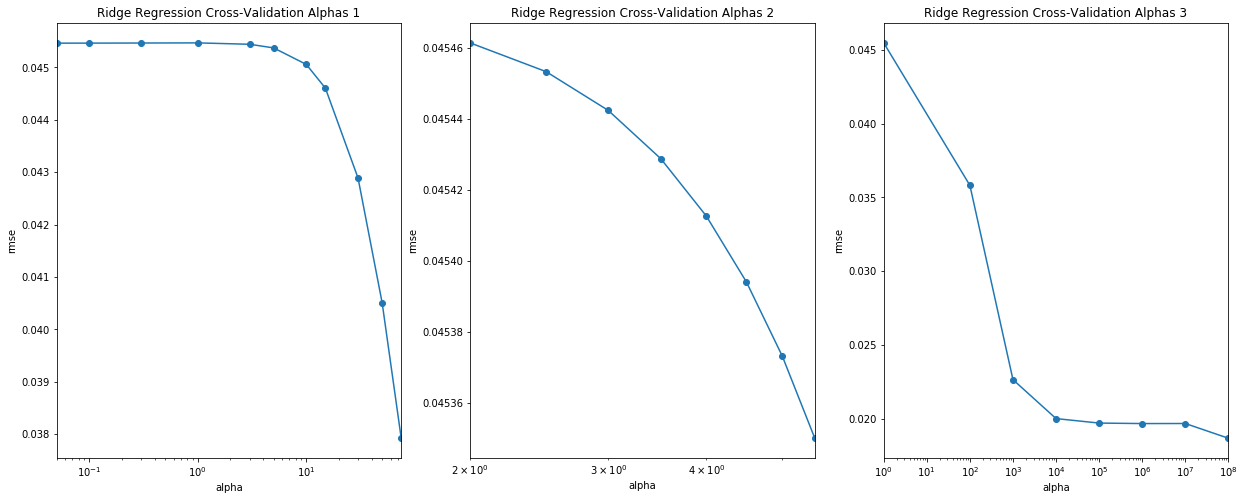

In [127]:
fig, axes = plt.subplots(1,3,figsize=(21,8))
cv_ridge1.plot(title='Ridge Regression Cross-Validation Alphas 1', style='-o', ax=axes[0])
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('rmse')
axes[0].set_xscale('log')

cv_ridge2.plot(title='Ridge Regression Cross-Validation Alphas 2', style='-o', ax=axes[1])
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('rmse')
axes[1].set_xscale('log')

cv_ridge3.plot(title='Ridge Regression Cross-Validation Alphas 3', style='-o', ax=axes[2])
axes[2].set_xlabel('alpha')
axes[2].set_ylabel('rmse')
axes[2].set_xscale('log')

In [128]:
best_alpha = alphas3[np.argmin(cv_ridge3.values)]
best_alpha

100000000.0

In [129]:
rr_cv_best = rmse_cv(Ridge(alpha=best_alpha))
rr = Ridge(alpha=best_alpha)
rr.fit(X_train, y_train)
y_train_rr = rr.predict(X_train)
y_test_rr = rr.predict(X_test)
rr_results = pd.DataFrame({
    'model_type': 'Ridge Regression',
    'CV error': rr_cv_best.mean(),
    'CV std': rr_cv_best.std(),
    'training_error': [mean_squared_error(y_train, y_train_rr)],
    'test_error': [mean_squared_error(y_test, y_test_rr)],
    'training_r2_score': [r2_score(y_train, y_train_rr)],
    'test_r2_score': [r2_score(y_test, y_test_rr)]
})
rr_results

,model_type,CV error,CV std,training_error,test_error,training_r2_score,test_r2_score
0,Ridge Regression,0.018687,0.006073,59965.31695,43686.917646,0.017384,0.012463


### Lasso Regression

In [0]:
lasso_alphas1 = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1]
cv_lasso1 = [rmse_cv(Lasso(alpha=alpha, max_iter=2000)).mean() for alpha in lasso_alphas1]

In [0]:
lasso_alphas2 = [1, 5, 10, 25, 50, 100]
cv_lasso2 = [rmse_cv(Lasso(alpha=alpha, max_iter=2000)).mean() for alpha in lasso_alphas2]

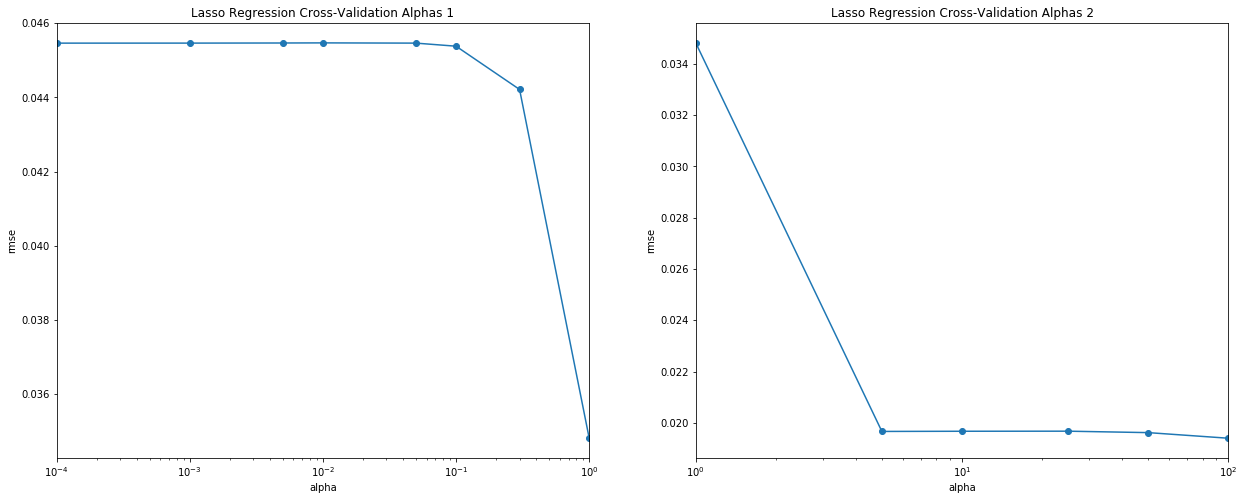

In [132]:
cv_lasso1 = pd.Series(cv_lasso1, index=lasso_alphas1)
cv_lasso2 = pd.Series(cv_lasso2, index=lasso_alphas2)

fig, axes = plt.subplots(1,2,figsize=(21,8))
cv_lasso1.plot(title='Lasso Regression Cross-Validation Alphas 1', style='-o', ax=axes[0])
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('rmse')
axes[0].set_xscale('log')

cv_lasso2.plot(title='Lasso Regression Cross-Validation Alphas 2', style='-o', ax=axes[1])
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('rmse')
axes[1].set_xscale('log')

In [0]:
# best_lasso_alpha = lasso_alphas2[np.argmin(cv_lasso2.values)]
best_lasso_alpha = 5

In [134]:
lasso_cv_best = rmse_cv(Lasso(alpha=best_lasso_alpha))
lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
y_train_lasso = lasso_model.predict(X_train)
y_test_lasso = lasso_model.predict(X_test)
lasso_results = pd.DataFrame({
    'model_type': 'Lasso Regression',
    'CV error': lasso_cv_best.mean(),
    'CV std': lasso_cv_best.std(),
    'training_error': [mean_squared_error(y_train, y_train_lasso)],
    'test_error': [mean_squared_error(y_test, y_test_lasso)],
    'training_r2_score': [r2_score(y_train, y_train_lasso)],
    'test_r2_score': [r2_score(y_test, y_test_lasso)]
})
lasso_results

,model_type,CV error,CV std,training_error,test_error,training_r2_score,test_r2_score
0,Lasso Regression,0.019664,0.006183,59910.220759,43635.864983,0.018287,0.013617


In [135]:
lasso_coefs = pd.Series(lasso_model.coef_, index=num_features.columns)
lasso_coefs

latitude                          0.000000
longitude                        -0.000000
minimum_nights                    0.161610
number_of_reviews                -0.180078
last_review                      -0.017931
reviews_per_month                -0.000000
calculated_host_listings_count    0.164204
availability_365                  0.167021
dtype: float64

### Random Forest Regressor

In [136]:
rfr_cv_baseline = rmse_cv(RandomForestRegressor(random_state=42))
rfr_baseline = RandomForestRegressor(random_state=42)
rfr_baseline.fit(X_train, y_train)
y_train_rfr = rfr_baseline.predict(X_train)
y_test_rfr = rfr_baseline.predict(X_test)
rfr_baseline_results = pd.DataFrame({
    'model_type': 'Random Forest Regression',
    'CV error': rfr_cv_baseline.mean(),
    'CV std': rfr_cv_baseline.std(),
    'training_error': [mean_squared_error(y_train, y_train_rfr)],
    'test_error': [mean_squared_error(y_test, y_test_rfr)],
    'training_r2_score': [r2_score(y_train, y_train_rfr)],
    'test_r2_score': [r2_score(y_test, y_test_rfr)]
})
rfr_baseline_results

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

,model_type,CV error,CV std,training_error,test_error,training_r2_score,test_r2_score
0,Random Forest Regression,-0.016454,0.031204,10703.95303,49614.329169,0.824601,-0.121526


In [137]:
rfr_baseline.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1608637542, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1273642419, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2

In [0]:
# pip install eli5

In [139]:
import eli5
eli5.show_weights(rfr_baseline, feature_names=list(num_features.columns))

Weight,Feature
0.2810 ± 0.1549,longitude
0.2718 ± 0.1580,latitude
0.1137 ± 0.1034,minimum_nights
0.0941 ± 0.0475,availability_365
0.0808 ± 0.0798,last_review
0.0590 ± 0.0484,calculated_host_listings_count
0.0532 ± 0.0549,reviews_per_month
0.0464 ± 0.0484,number_of_reviews
